# EDA Student Performance Indicator
## 1) Problem Statement
- This Project understands how the student's performance(Test Scores) is affected by other variables such as Gender, Ethnicity, Parental Level of Education, Lunch and Test Preparation Course.
## 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
- The data consists of 8 columns and 1000 rows.
## 3) Dataset Information
- gender: sex of students -> (Male/Female)
- race/ethnicity: ethnicity of the students -> (Group A,B,C,D,E)
- parental level of education: parent's final education -> (bachelor's degree, some college, associate's degree, master's degree, high school)
- lunch: having lunch before test (standard or free/reduced)
- test preparation: complete or not complete before test
- math score
- reading score
- writing score

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the Dataset
df = pd.read_csv('exams.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group A,high school,free/reduced,none,56,63,60
1,female,group D,some college,standard,completed,71,83,84
2,male,group C,some high school,free/reduced,completed,76,76,68
3,female,group E,some high school,free/reduced,none,57,67,63
4,female,group C,bachelor's degree,free/reduced,none,48,58,61


In [3]:
df.shape

(1000, 8)

## Data Checks to Performance
- Check Missing Value
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of the dataset
- Check various categories present in different categorical columns 

In [4]:
# Check missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Insights
There are no missing values.

In [6]:
# Check Duplicates
df.duplicated().sum()

0

There are no duplicate values.

In [7]:
# Check Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
# Check unique values of each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     76
reading score                  70
writing score                  75
dtype: int64

In [9]:
# Check the statistics of the dataset
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.582000,70.265000,68.963000
std,14.735889,13.943428,14.657369
min,14.000000,23.000000,15.000000
25%,58.000000,61.000000,60.000000
50%,67.000000,71.000000,69.000000
75%,78.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


## Insights
- From the above description of the data, all means are very close to each other - between 67 and 70
- All the standard deviation are close - between 13.9 - 14.7
- While there is minimum of 14 for maths, others are having 23 and 15 value
- There is maximum score of 100 for the three.

In [11]:
# Explore more info about the data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group A,high school,free/reduced,none,56,63,60
1,female,group D,some college,standard,completed,71,83,84
2,male,group C,some high school,free/reduced,completed,76,76,68
3,female,group E,some high school,free/reduced,none,57,67,63
4,female,group C,bachelor's degree,free/reduced,none,48,58,61


In [13]:
df.tail() #last 5 records

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group C,bachelor's degree,standard,none,64,83,78
996,male,group C,some high school,free/reduced,none,40,39,26
997,female,group C,some high school,free/reduced,none,61,76,71
998,male,group B,some college,standard,completed,72,84,80
999,female,group D,associate's degree,free/reduced,completed,84,97,100


In [14]:
#segregate numerical and categorical variables
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

In [15]:
numerical_feature

['math score', 'reading score', 'writing score']

In [16]:
categorical_feature

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [17]:
# Aggregate total score with mean
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group A,high school,free/reduced,none,56,63,60,179,59.666667
1,female,group D,some college,standard,completed,71,83,84,238,79.333333
2,male,group C,some high school,free/reduced,completed,76,76,68,220,73.333333
3,female,group E,some high school,free/reduced,none,57,67,63,187,62.333333
4,female,group C,bachelor's degree,free/reduced,none,48,58,61,167,55.666667


<Axes: xlabel='average', ylabel='Count'>

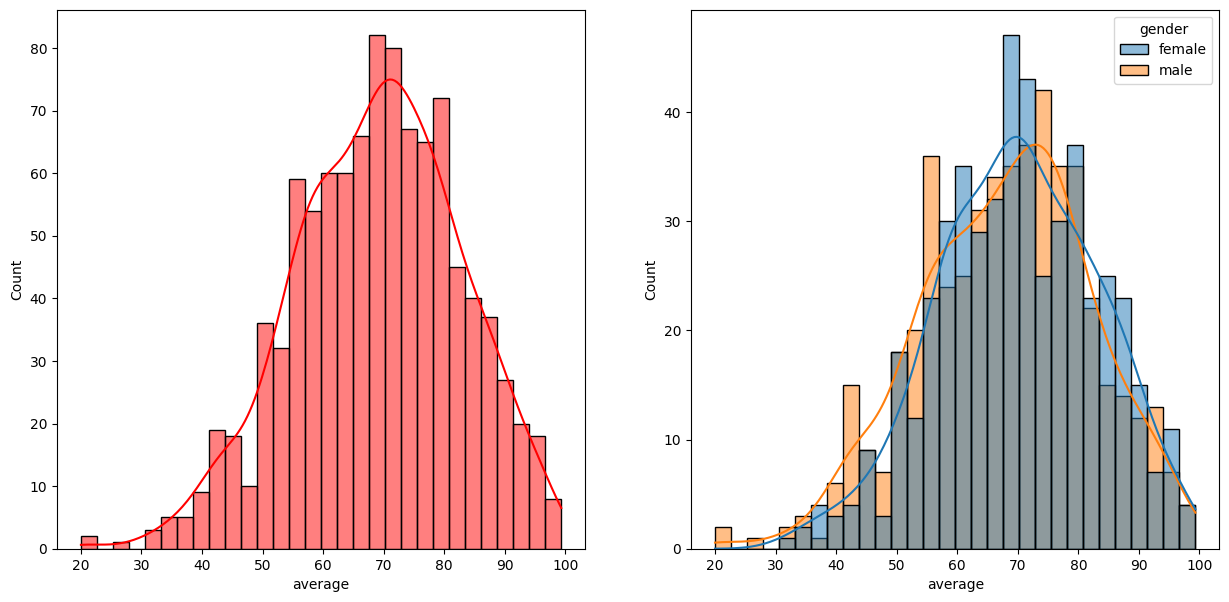

In [19]:
## Explore more visualization
fig, axis = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', kde=True, bins=30, color='r')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, bins=30, hue='gender')

## Insights
- Female students tend to perform well than the male students.

<Axes: xlabel='average', ylabel='Count'>

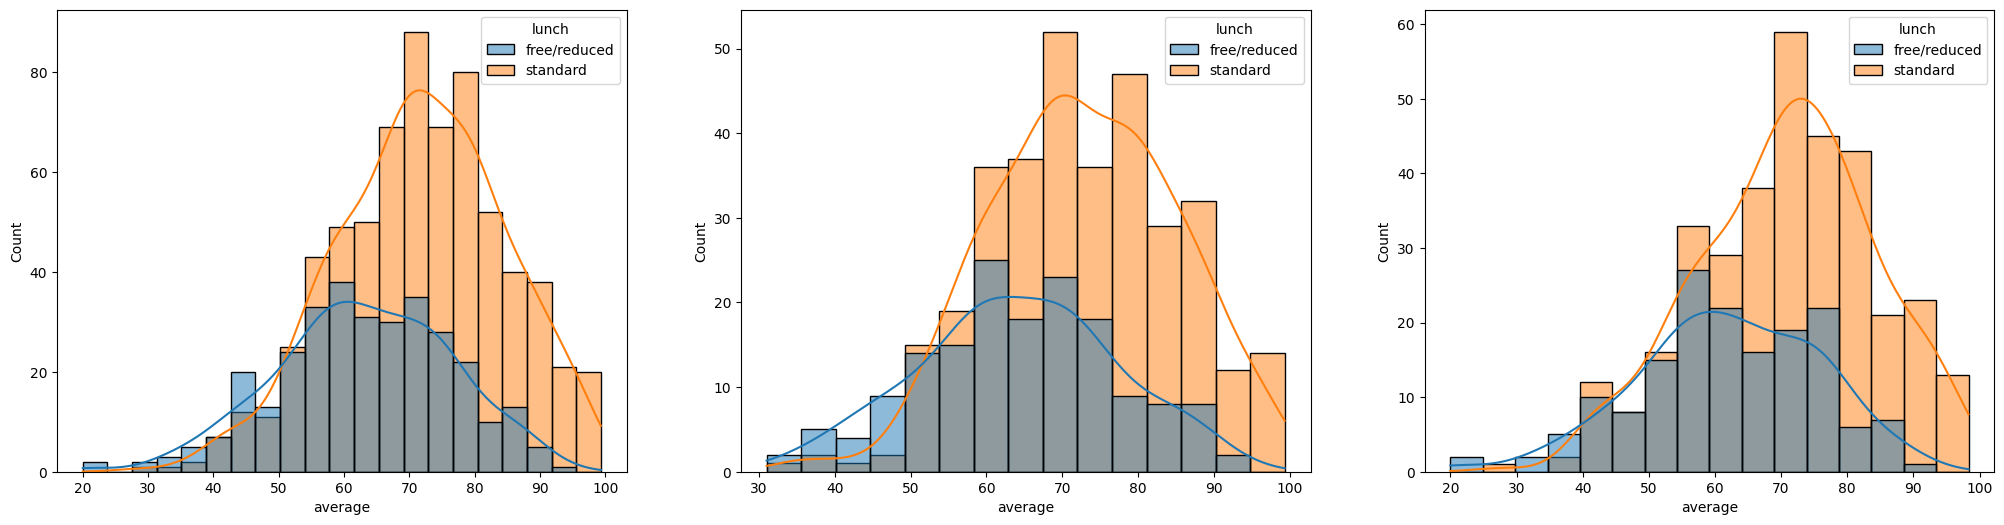

In [22]:
plt.subplots(1,3, figsize=(25, 6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')

## Insights
- Standard Lunch helps students perform well in the exams.
- Standard Lunch helps students perform well in the exams be it a male or female.

In [23]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group A,high school,free/reduced,none,56,63,60,179,59.666667
1,female,group D,some college,standard,completed,71,83,84,238,79.333333
2,male,group C,some high school,free/reduced,completed,76,76,68,220,73.333333
3,female,group E,some high school,free/reduced,none,57,67,63,187,62.333333
4,female,group C,bachelor's degree,free/reduced,none,48,58,61,167,55.666667


<Axes: xlabel='average', ylabel='Count'>

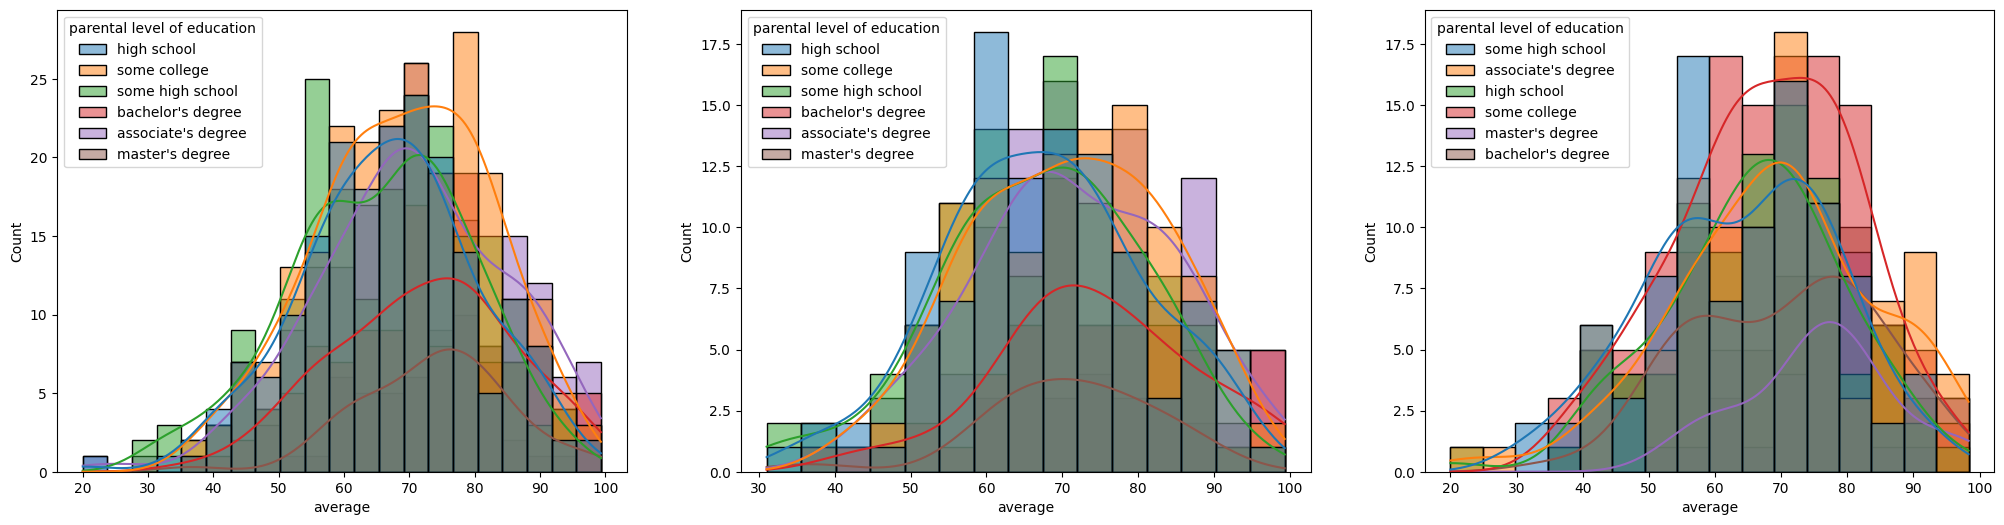

In [24]:
plt.subplots(1,3, figsize=(25, 6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental level of education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental level of education')

## Insights
- In general parent's education don't help student perform well in the exam.
- 2nd plot we can see there is no effect of parent's education on female students.
- 3rd plot shows that parents whose educatioin is of master's degree their male child tend to perform well in the exam.

<Axes: xlabel='average', ylabel='Count'>

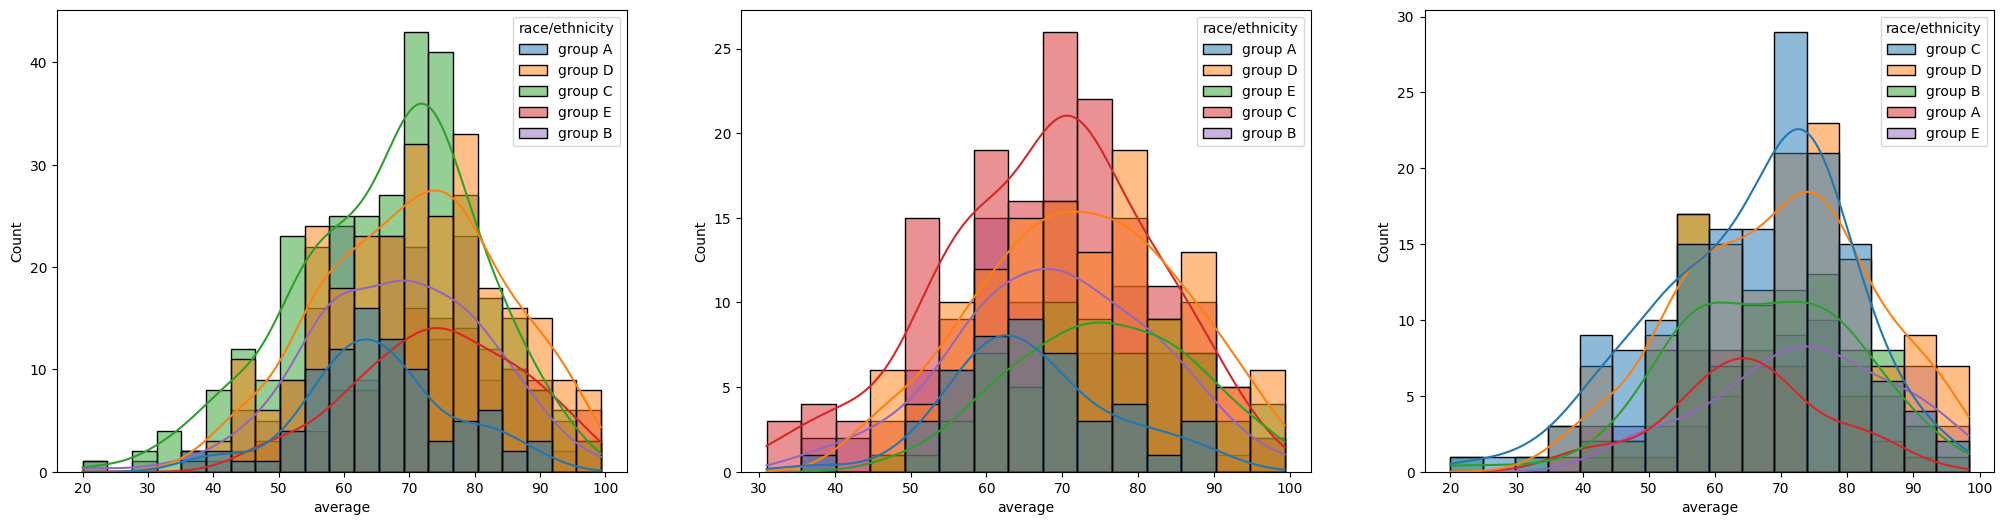

In [25]:
plt.subplots(1,3, figsize=(25, 6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race/ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='race/ethnicity')

## Insights
- Students of Group A and Group B tends to perform poorly in exam.
- Students of Group A and Group B tends to perform poorly in exam irrespective of whether they are male or female.

<Axes: >

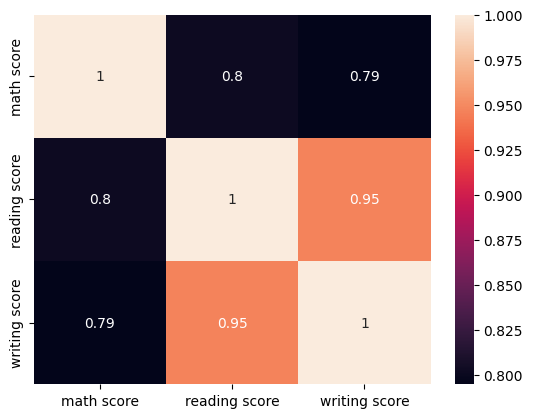

In [29]:
sns.heatmap(df[numerical_feature].corr(),annot=True)